In [16]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd

# 한국 인기 검색어
pytrends=TrendReq(hl='ko',tz=540)

kw_list=[""]
pytrends.build_payload(kw_list,geo='US',timeframe='now 1-d')

searches_df=pytrends.trending_searches(pn='south_korea')
top_keywords=searches_df[0].tolist()

print("대한민국 오늘의 트렌드 키워드 :")
for i, keyword in enumerate(top_keywords, start=1):
    print(f"{i}. {keyword}")


대한민국 오늘의 트렌드 키워드 :
1. 리니지M
2. 이미르
3. 로드나인
4. 봉준호
5. 그놈은 흑염룡
6. 우수
7. 김현태
8. 바르셀로나
9. 티웨이항공
10. 김상민 검사
11. 그록3
12. 진에어
13. 맨유
14. 김신영
15. 키키
16. 공덕역
17. 크래프톤
18. 차주영
19. EV4
20. 김새론


In [17]:
# 특정 키워드에 대한 관련 검색어 추천 

pytrend=TrendReq()

result=pytrend.suggestions(keyword='피자')

print(type(result))
df=pd.DataFrame(result)
df=df.drop(columns='mid')
print(df)

<class 'list'>
                     title              type
0                    Pizza              Dish
1                 Domino's  Restaurant chain
2                Pizza Hut  Restaurant chain
3               Papa Johns  Restaurant chain
4  Five Nights at Freddy's     Survival game


In [23]:
# 시간에 따른 검색 키워드의 인기도 변화 

from pytrends.request import TrendReq
import	matplotlib.pyplot as plt

pytrend = TrendReq(hl='ko', tz=540)

kw_list = ["chicken", "beef", "pork", "salmon"]


pytrend.build_payload(kw_list, cat=0, timeframe='2021-01-01 2021-05-01', geo='KR')
df = pytrend.interest_over_time()

# plot food trends over time
plt.plot(df.index, df.chicken, color='black', marker='o', markersize=5)
plt.plot(df.index, df.beef, color='red', marker='s', markersize=5)
plt.plot(df.index, df.pork, color='blue', marker='^', markersize=5)
plt.plot(df.index, df.salmon, color='green', marker='>', markersize=5)
plt.legend(['chicken', 'beef', 'pork', 'salmon'])

plt.grid(True)
plt.show()



TooManyRequestsError: The request failed: Google returned a response with code 429

시도 1 실패: 요청이 너무 많습니다. 60초 후에 다시 시도합니다...
시도 2 실패: 요청이 너무 많습니다. 60초 후에 다시 시도합니다...


c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) miss

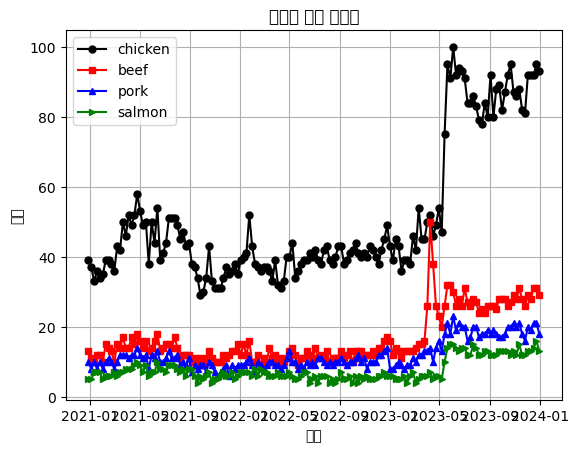

In [24]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from pytrends.exceptions import TooManyRequestsError
import time

pytrend = TrendReq(hl='ko', tz=540)

kw_list = ["chicken", "beef", "pork", "salmon"]
최대_재시도_횟수 = 5
기간 = '2021-01-01 2024-01-01'  # 기간을 줄입니다.

for attempt in range(최대_재시도_횟수):
    try:
        pytrend.build_payload(kw_list, cat=0, timeframe=기간, geo='KR')
        df = pytrend.interest_over_time()
        
        # 음식 트렌드 그래프 그리기
        plt.plot(df.index, df.chicken, color='black', marker='o', markersize=5)
        plt.plot(df.index, df.beef, color='red', marker='s', markersize=5)
        plt.plot(df.index, df.pork, color='blue', marker='^', markersize=5)
        plt.plot(df.index, df.salmon, color='green', marker='>', markersize=5)
        plt.legend(['chicken', 'beef', 'pork', 'salmon'])
        plt.xlabel('날짜')
        plt.ylabel('인기')
        plt.title('한국의 음식 트렌드')
        plt.grid(True)
        plt.show()
        break
    except TooManyRequestsError:
        print(f"시도 {attempt + 1} 실패: 요청이 너무 많습니다. 60초 후에 다시 시도합니다...")
        time.sleep(60)
else:
    print("모든 시도가 실패했습니다. 나중에 다시 시도해 주세요.")


In [25]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# PyTrends 요청 초기화
pytrend = TrendReq()

# 키워드 리스트 정의
kw_list = ['ChatGPT', 'Gemini', 'Copilot', 'DeepSeek', 'Perplexity']

# 데이터 빌드
pytrend.build_payload(kw_list=kw_list, timeframe='today 1-m')
df = pytrend.interest_over_time()
df = df.drop(columns='isPartial')
print(df)

# 최근 한 달간 트랜드 검색 - 날짜를 월-일 형태로 변경
xtick_list = df.index.strftime('%m-%d').tolist()

# 그래프 크기 설정
plt.figure(figsize=(10, 4))

# 그래프 제목 설정
plt.title('AI Chatbot Interest')

# 각 키워드에 대한 데이터 플롯
for kw in kw_list:
    plt.plot(xtick_list, df[kw], marker='o', markersize=5, label=kw)

# x축 눈금 설정
plt.xticks(range(len(xtick_list)), xtick_list, rotation=80)

# 범례 추가
plt.legend(kw_list)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


TooManyRequestsError: The request failed: Google returned a response with code 429

시도 1 실패: 요청이 너무 많습니다. 30초 후에 다시 시도합니다...
시도 2 실패: 요청이 너무 많습니다. 30초 후에 다시 시도합니다...
            ChatGPT  Gemini  Copilot  DeepSeek  Perplexity
date                                                      
2025-01-19       51       7        2         1           2
2025-01-20       74       9        4         1           2
2025-01-21       74       9        4         2           2
2025-01-22       78       9        4         3           2
2025-01-23      100      13        5         4           3
2025-01-24       72       9        4         4           2
2025-01-25       49       7        2         6           2
2025-01-26       52       8        2         9           2
2025-01-27       79      10        4        54           3
2025-01-28       85       9        4        82           3
2025-01-29       83      10        4        59           3
2025-01-30       81      10        4        39           2
2025-01-31       75       9        4        29           2
2025-02-01       51       7      

c:\Users\knudc\anaconda3\envs\bigdata\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


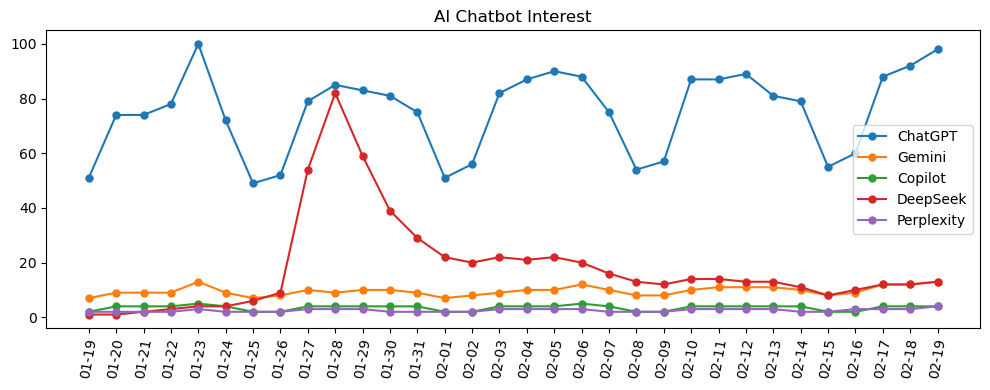

In [26]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from pytrends.exceptions import TooManyRequestsError
import time

pytrend = TrendReq()

kw_list = ['ChatGPT', 'Gemini', 'Copilot', 'DeepSeek', 'Perplexity']
최대_재시도_횟수 = 5
기간 = 'today 1-m'  # 최근 한 달간 데이터

for attempt in range(최대_재시도_횟수):
    try:
        pytrend.build_payload(kw_list=kw_list, timeframe=기간)
        df = pytrend.interest_over_time()
        df = df.drop(columns='isPartial')
        print(df)
        
        # 날짜를 월-일 형태로 변경
        xtick_list = df.index.strftime('%m-%d').tolist()
        
        # 그래프 크기 설정
        plt.figure(figsize=(10, 4))
        
        # 그래프 제목 설정
        plt.title('AI Chatbot Interest')
        
        # 각 키워드에 대한 데이터 플롯
        for kw in kw_list:
            plt.plot(xtick_list, df[kw], marker='o', markersize=5, label=kw)
        
        # x축 눈금 설정
        plt.xticks(range(len(xtick_list)), xtick_list, rotation=80)
        
        # 범례 추가
        plt.legend(kw_list)
        
        # 레이아웃 조정
        plt.tight_layout()
        
        # 그래프 표시
        plt.show()
        break
    except TooManyRequestsError:
        print(f"시도 {attempt + 1} 실패: 요청이 너무 많습니다. 30초 후에 다시 시도합니다...")
        time.sleep(30)
else:
    print("모든 시도가 실패했습니다. 나중에 다시 시도해 주세요.")
